In [15]:
import numpy as np
import matplotlib.pyplot as plt

# sin(2πx) Random Genration

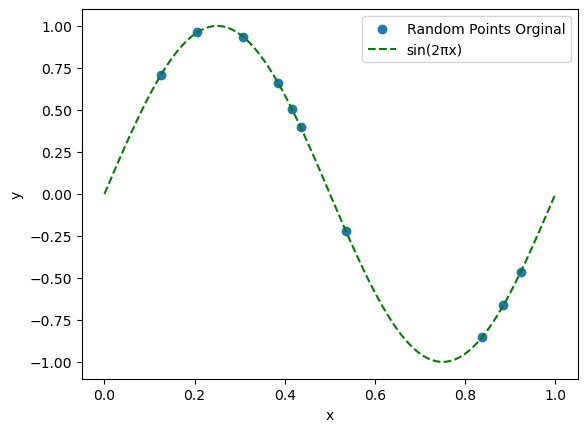

In [16]:

num_points = 10

x = np.random.rand(num_points)


y = np.sin(2 * np.pi * x)

x_sin = np.linspace(0, 1, 100)
y_sin = np.sin(2 * np.pi * x_sin)

plt.scatter(x, y, label='Random Points Orginal')
plt.plot(x_sin, y_sin, label='sin(2πx)', color='green', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Add Noise

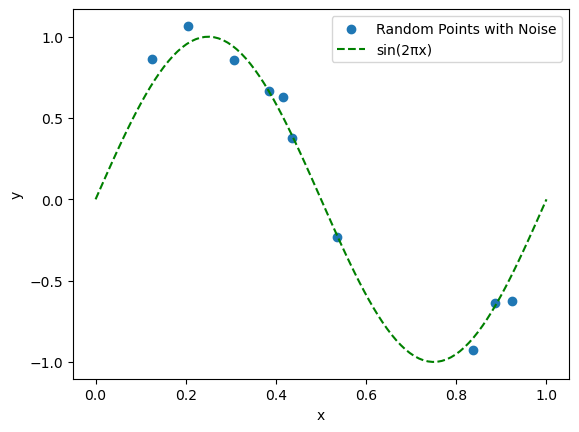

In [17]:
# add noise
noise = np.random.normal(0, 0.1, num_points)
y_noise = y + noise

plt.scatter(x, y_noise, label='Random Points with Noise')
plt.plot(x_sin, y_sin, label='sin(2πx)', color='green', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Linear Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import operator

0.21616964619838774
0.9044767389921667


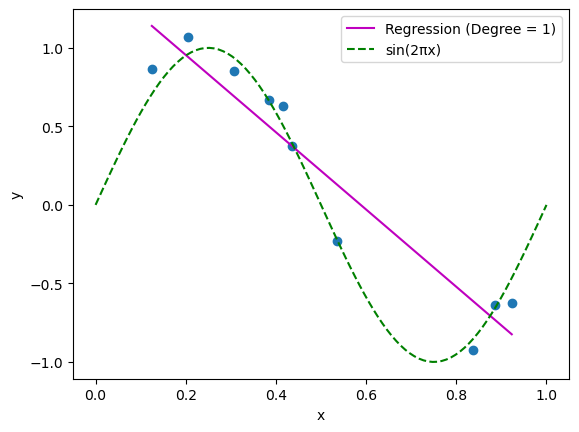

0.2159655753331601
0.9046570077174395


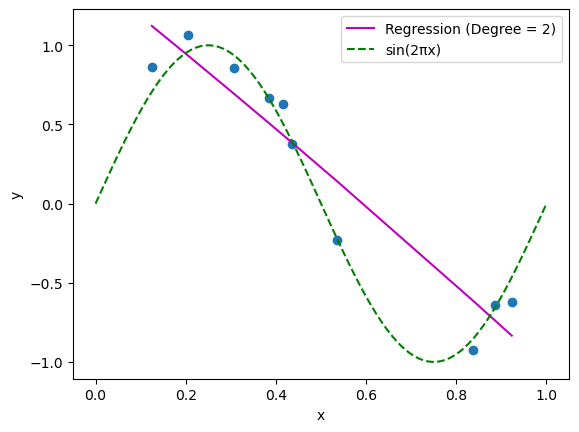

0.07375856737351488
0.9888789789670515


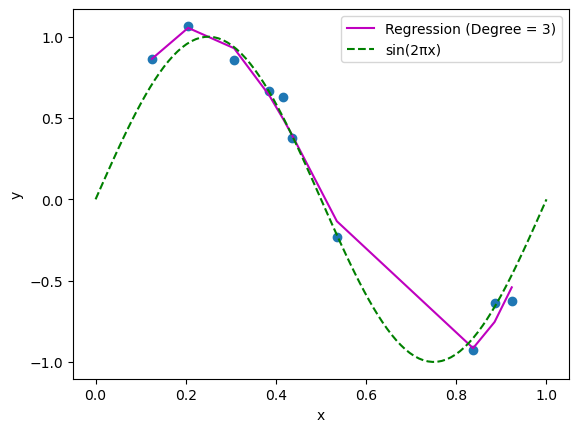

0.07245226070961734
0.9892694100593478


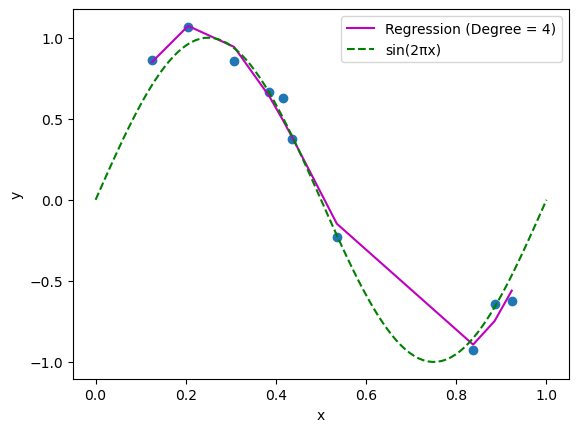

0.06080801618046773
0.99244139958828


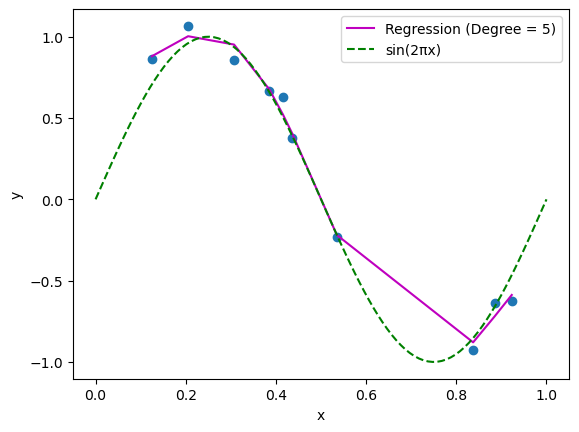

0.03661860628756639
0.9972589097270044


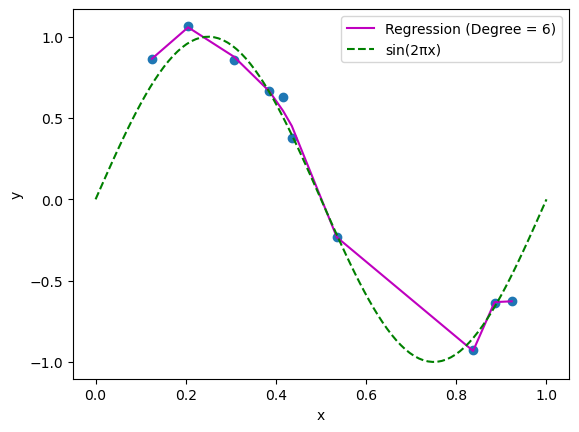

0.03597948443181794
0.9973537578159725


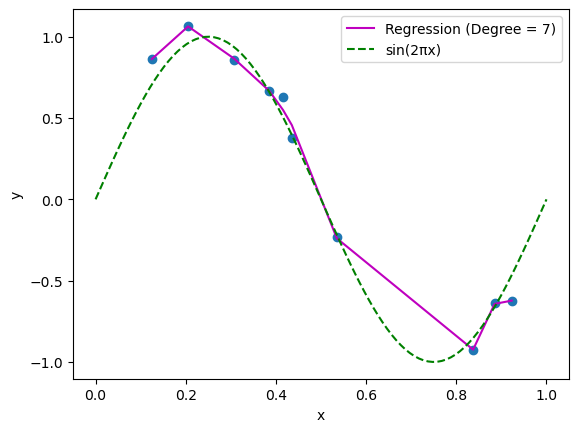

0.03220780263311308
0.997879482264753


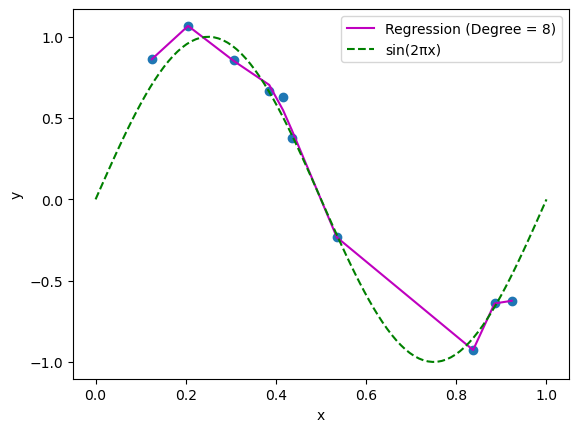

1.8384626599160955e-09
1.0


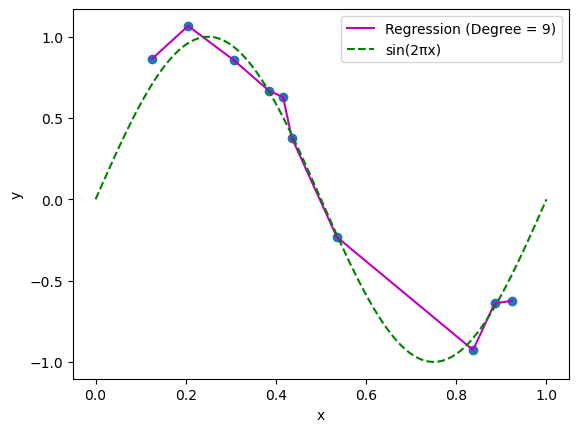

In [19]:
# transforming the data to include another axis

for degree in range(1,10):
    _x = x.reshape(-1, 1)
    _y = y_noise.reshape(-1, 1)
    
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(_x)

    model = LinearRegression()
    model.fit(x_poly, _y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(_y,y_poly_pred))
    r2 = r2_score(_y,y_poly_pred)
    print(rmse)
    print(r2)

    plt.scatter(_x, _y)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(_x,y_poly_pred), key=sort_axis)
    _x, y_poly_pred = zip(*sorted_zip)
    plt.plot(_x, y_poly_pred, label=f'Regression (Degree = {degree})' , color='m')
    plt.plot(x_sin, y_sin, label='sin(2πx)', color='green', linestyle='dashed')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Add OutLier

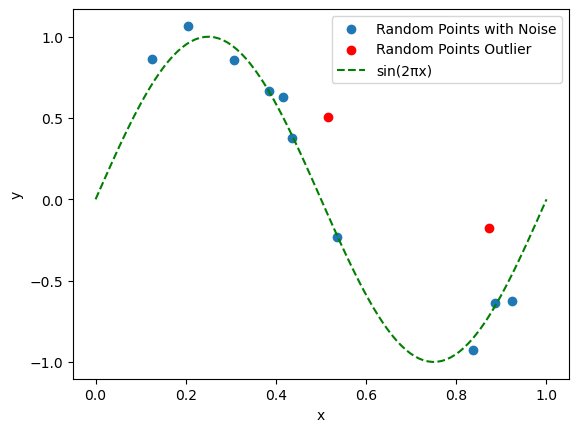

In [20]:
# add outlire 
outliers_x = np.random.rand(2)
outliers_y = np.random.uniform(0, 1, 2) * 2 - 1 

x_values = np.concatenate((x, outliers_x))
y_values = np.concatenate((y_noise, outliers_y))

plt.scatter(x, y_noise, label='Random Points with Noise')
plt.scatter(outliers_x, outliers_y, label='Random Points Outlier', color = 'red')
plt.plot(x_sin, y_sin, label='sin(2πx)', color='green', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Regression , Lasso , Ridge

In [21]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

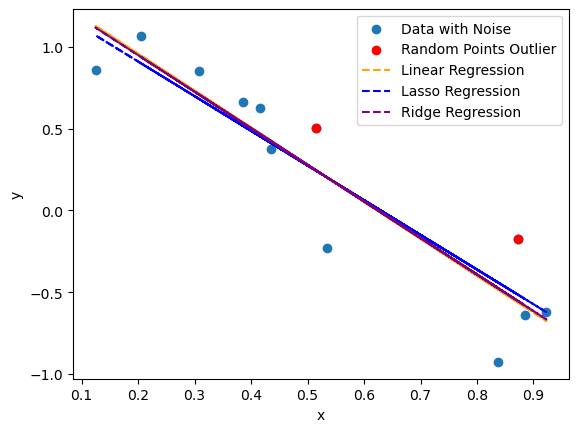

In [22]:
# ب) انجام رگرسیون ساده
model_linear = LinearRegression()
model_linear.fit(x_values.reshape(-1, 1), y_values)
y_pred_linear = model_linear.predict(x_values.reshape(-1, 1))

# ب) انجام رگرسیون Lasso
model_lasso = make_pipeline(Lasso(alpha=0.01))
model_lasso.fit(x_values.reshape(-1, 1), y_values)
y_pred_lasso = model_lasso.predict(x_values.reshape(-1, 1))

# ب) انجام رگرسیون Ridge
model_ridge = make_pipeline(Ridge(alpha=0.01))
model_ridge.fit(x_values.reshape(-1, 1), y_values)
y_pred_ridge = model_ridge.predict(x_values.reshape(-1, 1))

# نمایش نقاط تصادفی و نتایج رگرسیون
plt.scatter(x_values, y_values, label='Data with Noise')
plt.scatter(outliers_x, outliers_y, label='Random Points Outlier', color = 'red')
plt.plot(x_values, y_pred_linear, label='Linear Regression', color='orange', linestyle='dashed')
plt.plot(x_values,y_pred_lasso, label='Lasso Regression', color='blue', linestyle='dashed')
plt.plot(x_values, y_pred_ridge, label='Ridge Regression', color='purple', linestyle='dashed')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Mean Absolute Error (MAE)

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
from sklearn.metrics import mean_absolute_error

# تابع برای محاسبه و نمایش MAE
def calculate_and_display_mae(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    print(f'MAE ({label}): {mae:.4f}')

# Regression
y_pred_simple = model_linear.predict(x_values.reshape(-1, 1))
calculate_and_display_mae(y_values, y_pred_simple, 'Simple Regression')

# Lasso
y_pred_lasso = model_lasso.predict(x_values.reshape(-1, 1))
calculate_and_display_mae(y_values, y_pred_lasso, 'Lasso Regression')

# Ridge
y_pred_ridge = model_ridge.predict(x_values.reshape(-1, 1))
calculate_and_display_mae(y_values, y_pred_ridge, 'Ridge Regression')


MAE (Simple Regression): 0.2070
MAE (Lasso Regression): 0.2103
MAE (Ridge Regression): 0.2075


# Root Mean Squared Error (RMSE)

In [25]:
from sklearn.pipeline import make_pipeline

In [26]:
degree = 9
lambda_values = np.logspace(-7, 10, num=100)
alphas = np.arange(1e-7, 1e-5 + 1e-7, 1e-7)


In [27]:
def calculate_and_display_rmse(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.682e-01, tolerance: 5.127e-04
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.680e-01, tolerance: 5.127e-04
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e-01, toleranc

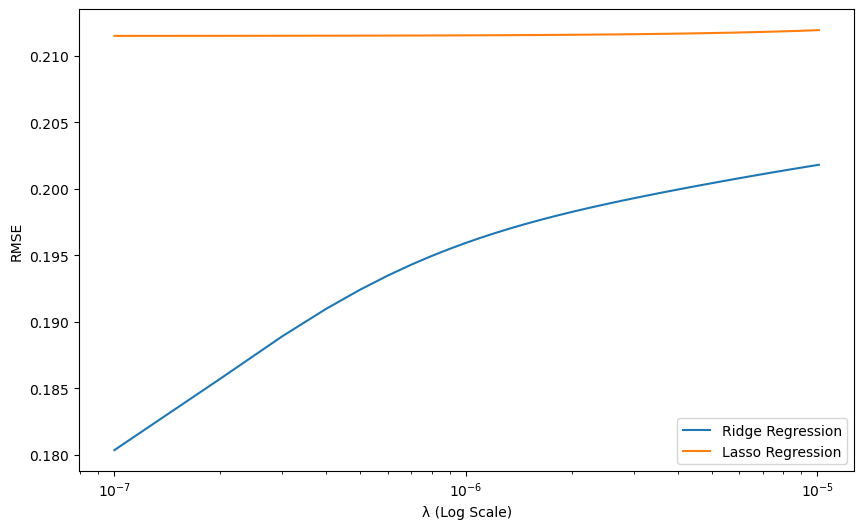

In [28]:
#Ridge
rmse_ridge = []
for alpha in alphas:
    model_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    model_ridge.fit(x_values.reshape(-1, 1), y_values)
    y_pred_ridge = model_ridge.predict(x_values.reshape(-1, 1))
    rmse_ridge.append(calculate_and_display_rmse(y_values, y_pred_ridge, f'Ridge (λ={alpha:.2e})'))


#Lasso
rmse_lasso = []
for alpha in alphas:
    model_lasso = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    model_lasso.fit(x_values.reshape(-1, 1), y_values)
    y_pred_lasso = model_lasso.predict(x_values.reshape(-1, 1))
    rmse_lasso.append(calculate_and_display_rmse(y_values, y_pred_lasso, f'Lasso (λ={alpha:.2e})'))

plt.figure(figsize=(10, 6))
plt.plot(alphas, rmse_ridge, label='Ridge Regression')
plt.xscale('log')
plt.xlabel('λ (Log Scale)')
plt.ylabel('RMSE')
plt.plot(alphas, rmse_lasso, label='Lasso Regression')
plt.legend()
plt.show()
